#PDAN8412 ASSIGNMENT 2 : LOGISTIC REGRESSION

**Dataset source:**<br>
Kaggle Datasets<br>
Author: Yakhyojon<br>
Link:  https://www.kaggle.com/code/yakhyojon/airline-customer-satisfaction-logistic-regression

**Logistic Regression**

Kanade(2022) defines Logistic regression as a  supervised classification Machine Learning algorithm that uses probability to predict an outcome.Logistic regression is often used when the target variable is categorical(Swaminathan 2022),and,although also can be used for multi-class classification,is popularly used for binary classification.Logistic regression is built at the back of Linear regression, but it is used for a different type of prediction and modeling.While in Linear regression, the dependent variable is continuous, which means it can take any real-numbered value,in logistic regression, the dependent variable is categorical and (mostly)binary.<br>

Logistic regression uses the sigmoid function to model the relationship between the independent variables and estimates the probability of the dependent variable taking a particular value. Linear regression's equation tries to find a best fitting line on the dataset, where the input values are combined linearly to predict an output value using weights or coefficient values.Logistic Regression's equation is similar,however,The sigmoid function converts any real value to a range between 0 and 1.

To measure how well the model is perfoming,Logistic regression uses cross entropy as a loss function,where the difference between the actual and predicted output is calculated.To reduce these differences,an optimisation algorithm called Gradient descent is used with a specified learning rate to adjust the weight and bias in the sigmoid function,and improve the model's ability to predict probability.

Kanade,V.2022.What Is Logistic Regression? Equation, Assumptions, Types, and Best Practices; Spiceworks, 18 April 2022.[Online].Available at: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/

Swaminathan, S.2018. Logistic Regression — Detailed Overview,Towards Data Science, 15 March 2018.[Online].Available at:https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

**The Dataset**<br>
The dataset is from Invistico Airlines and consists of over 120 000 customer surveys with customer information and airline service ratings.The data was used to survey customer satisfaction.
As mentioned above, Logistic regression is best used for binary classification problems,the dataset I am using is a binary classification dataset with Airline customer satisfaction/disatisfaction feedback. The different attributes in the survery are used as features,and Logistric regression has the ability to combine different features to make an independent variable,to predict the target variable.This data has 21 different features and allows for the model to combine them for the x variable,and the LR model is able to show which features are suitable to be able to predict a customers satisfaction rating.

**The Analysis**
The purpose of this analysis to use the features in the 21 columns available on the dataset to be able to predict if customer satisfaction, based on their personal data,booking information and ratings on the service.This would be helpful study to improve services through studying the relationship between the users information/rating and the satisfaction output.The analysis will be done in the followinf steps:

1.	EDA(Pandas and Pyspark):
•	Understanding the dataset structure (rows,columns,datatypes)<br>
•	Checking for missing data<br>
•	Visualising the data to gain insights into feature distributions and relationships.<br>

2.	Data Preprocessing (Preparing the Feature Variables):
•	Identifying the Feature columns(independent variables) removing null values<br>
•	Encoding categorical variables <br>
•	Scaling numerical features<br>
•	Identifying the target column<br>
•	Split the dataset into training and testing sets <br>

3.	Feature Selection:
•	As mentioned above, there are 21 different features in the dataset. feature selection techniques might be used to identify which features are most relevant for predicting customer satisfaction.
•	You can use methods like feature importance, correlation analysis, or recursive feature elimination to select the most informative features.
4.	Model The Building:
•	Setting up the parameters for my model,including the Learning rate, weights and bias, number of iterations<br>
•	Defining the sigmoid function, gradient descent and loss function<br>
•	Build a logistic regression model from scratch to predict customer satisfaction based on the selected features.<br>
•	Train the model using the training data and assess its performance using the testing data.<br>

5. Model Optimisation:
•	Fine-tuning the model by adjusting hyperparameters of my model including: the number of iterations,learning rate and adjusting the weights & bias<br>
•	Perform cross-validation to ensure the model's robustness and generalisation to unseen<br>

6.	Model Evaluation:
•	Evaluating the model's performance using metrics such as accuracy, precision, recall scores.<br>
•	Examining the confusion matrix to understand how well the model classifies satisfied and dissatisfied customers.<br>




In [ ]:
pip install spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58748 sha256=63131a64b38175763724eb3c14340ecc984531f78d4f31405126621328aa257b
  Stored in directory: /root/.cache/pip/wheels/63/88/77/b4131110ea4094540f7b47c6d62a649807d7e94800da5eab0b
Successfully built spark


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=7007227c3d8351cb5488528a35d54053fff2be5ac7d0a10205889a27f20521ea
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
import sklearn
from sklearn.preprocessing import StandardScaler

###1.LOAD DATA
In this step, the data is loaded as a CSV, and Exploratory Data Analysis is done with Pandas and PySpark.

In [ ]:
pandas_df = pd.read_csv('Invistico_Airline.csv')

In [ ]:
#viewing the data
pandas_df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [ ]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [ ]:
#perfoming basic statistics on the data
pandas_df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


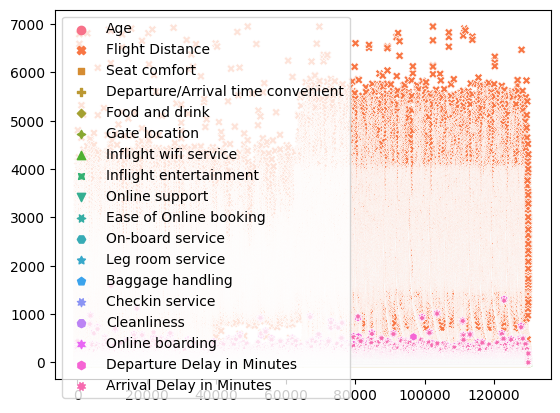

In [ ]:
sns.scatterplot(data=pandas_df)

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark  = SparkSession.builder.appName("Airline Rating").getOrCreate()

In [ ]:
spark_df = spark.read.csv('Invistico_Airline.csv', header=True)

In [ ]:
spark_df.show()

+------------+--------------+---+---------------+--------+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+----------------------+----------------+----------------+----------------+---------------+-----------+---------------+--------------------------+------------------------+
|satisfaction| Customer Type|Age| Type of Travel|   Class|Flight Distance|Seat comfort|Departure/Arrival time convenient|Food and drink|Gate location|Inflight wifi service|Inflight entertainment|Online support|Ease of Online booking|On-board service|Leg room service|Baggage handling|Checkin service|Cleanliness|Online boarding|Departure Delay in Minutes|Arrival Delay in Minutes|
+------------+--------------+---+---------------+--------+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+----------------------+-----

In [ ]:
spark_df.describe().show()

+-------+------------+-----------------+------------------+---------------+--------+-----------------+------------------+---------------------------------+-----------------+------------------+---------------------+----------------------+------------------+----------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------------+------------------------+
|summary|satisfaction|    Customer Type|               Age| Type of Travel|   Class|  Flight Distance|      Seat comfort|Departure/Arrival time convenient|   Food and drink|     Gate location|Inflight wifi service|Inflight entertainment|    Online support|Ease of Online booking|  On-board service|  Leg room service|  Baggage handling|   Checkin service|       Cleanliness|   Online boarding|Departure Delay in Minutes|Arrival Delay in Minutes|
+-------+------------+-----------------+------------------+---------------+--------+-----------------+------

### 2.PREPARING FEATURE VARIABLES FOR THE LOGISTIC REGRESSION MODEL

In [1]:
#viewing the categorical features in the dataset and the variations or number of options in each column
print("Customer Type variations")
spark_df.select('Customer Type').distinct().show()
print("Type of Travel variations")
spark_df.select('Type of Travel').distinct().show()
print("Difference Flight Classes")
spark_df.select('Class').distinct().show()

Customer Type variations


NameError: ignored

In [ ]:
from pyspark.sql.functions import col,isnan, when, count


In [ ]:
#checking for null values, as seen below only the Arrival delay column has null values
spark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in spark_df.columns]
   ).show()

+------------+-------------+---+--------------+-----+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+----------------------+----------------+----------------+----------------+---------------+-----------+---------------+--------------------------+------------------------+
|satisfaction|Customer Type|Age|Type of Travel|Class|Flight Distance|Seat comfort|Departure/Arrival time convenient|Food and drink|Gate location|Inflight wifi service|Inflight entertainment|Online support|Ease of Online booking|On-board service|Leg room service|Baggage handling|Checkin service|Cleanliness|Online boarding|Departure Delay in Minutes|Arrival Delay in Minutes|
+------------+-------------+---+--------------+-----+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+----------------------+----------------+---

In [ ]:
#counting the columns will null values
spark_df.count()-spark_df.dropna().count()


393

In [ ]:
#counting the columns without the null values
spark_df.dropna().count()

129487

In [ ]:
#dropping the null values
clean_df=spark_df.dropna()


In [ ]:
print((clean_df.count(), len(clean_df.columns)))

(129487, 22)


In [ ]:
#Viewing columns after removing the null values, as seen below none of the columns now have null values
clean_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in clean_df.columns]
   ).show()

+------------+-------------+---+--------------+-----+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+----------------------+----------------+----------------+----------------+---------------+-----------+---------------+--------------------------+------------------------+
|satisfaction|Customer Type|Age|Type of Travel|Class|Flight Distance|Seat comfort|Departure/Arrival time convenient|Food and drink|Gate location|Inflight wifi service|Inflight entertainment|Online support|Ease of Online booking|On-board service|Leg room service|Baggage handling|Checkin service|Cleanliness|Online boarding|Departure Delay in Minutes|Arrival Delay in Minutes|
+------------+-------------+---+--------------+-----+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+----------------------+----------------+---

###3. FEATURE-SELECTION (IDENTIFYING X AND Y VARIABLES)
**3.1.Identifying the Target column(y variable)<br>**
For the purpose of this model, the 'Satisfaction' column will be used as the target(y) column.As mentioned above, the aim on building this model is to use the data from the Airline passagers to be able to predict if the passanger will be satisfied or not satisfied with the Airline's services.

In [ ]:
#viewing the options in the satisfaction column, as seen below, there are only 2 options,hence this is a binary classification problem
clean_df.select('satisfaction').distinct().show()


+------------+
|satisfaction|
+------------+
|dissatisfied|
|   satisfied|
+------------+



In [ ]:
#counting how many records for each output in the target column
clean_df.groupBy('satisfaction').count().show()


+------------+-----+
|satisfaction|count|
+------------+-----+
|dissatisfied|58605|
|   satisfied|70882|
+------------+-----+



In [ ]:
#creating a visual for the records for each category(output) in the target column
visualise_df = clean_df.toPandas()

In [ ]:
value_counts=visualise_df['satisfaction'].value_counts()

(array([0, 1]), [Text(0, 0, 'satisfied'), Text(1, 0, 'dissatisfied')])

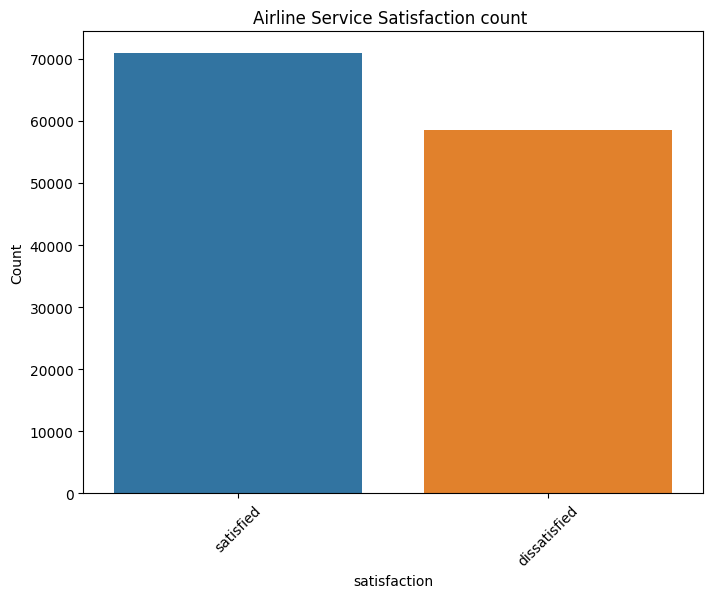

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title(f"Airline Service Satisfaction count ")
plt.xlabel('satisfaction')
plt.ylabel("Count")
plt.xticks(rotation=45)

In [ ]:
#Encoding the target column to binary(0 and 1)
cleaned_df = clean_df.withColumn("satisfaction",when(col("satisfaction")=="dissatisfied",0)
.when(col("satisfaction")=="satisfied",1))

In [ ]:
#showing the encoded column in the dataset
cleaned_df.show(50)

+------------+--------------+---+---------------+--------+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+----------------------+----------------+----------------+----------------+---------------+-----------+---------------+--------------------------+------------------------+
|satisfaction| Customer Type|Age| Type of Travel|   Class|Flight Distance|Seat comfort|Departure/Arrival time convenient|Food and drink|Gate location|Inflight wifi service|Inflight entertainment|Online support|Ease of Online booking|On-board service|Leg room service|Baggage handling|Checkin service|Cleanliness|Online boarding|Departure Delay in Minutes|Arrival Delay in Minutes|
+------------+--------------+---+---------------+--------+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+----------------------+-----

As seen above, the satisfaction column is showing only satisfied rows,this might be because the dataset was sort so that the 2 categories are appearing after each other, below, i reshuffle the dataset so that the rows are mixed on both satisfied and dissatisfied

In [ ]:
from pyspark.sql.functions import rand

In [ ]:
#randomising the roows in my dataset so that it is fairly proportioned for train/test split
shuffled_df = cleaned_df.orderBy(rand())

In [ ]:
shuffled_df.show(50)

+------------+-----------------+---+---------------+--------+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+----------------------+----------------+----------------+----------------+---------------+-----------+---------------+--------------------------+------------------------+
|satisfaction|    Customer Type|Age| Type of Travel|   Class|Flight Distance|Seat comfort|Departure/Arrival time convenient|Food and drink|Gate location|Inflight wifi service|Inflight entertainment|Online support|Ease of Online booking|On-board service|Leg room service|Baggage handling|Checkin service|Cleanliness|Online boarding|Departure Delay in Minutes|Arrival Delay in Minutes|
+------------+-----------------+---+---------------+--------+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+-------------------

In [ ]:
shuffled_df.groupBy('satisfaction').count().show()


+------------+-----+
|satisfaction|count|
+------------+-----+
|           1|70882|
|           0|58605|
+------------+-----+



In [ ]:
shuffled_df.printSchema()

root
 |-- satisfaction: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight Distance: string (nullable = true)
 |-- Seat comfort: string (nullable = true)
 |-- Departure/Arrival time convenient: string (nullable = true)
 |-- Food and drink: string (nullable = true)
 |-- Gate location: string (nullable = true)
 |-- Inflight wifi service: string (nullable = true)
 |-- Inflight entertainment: string (nullable = true)
 |-- Online support: string (nullable = true)
 |-- Ease of Online booking: string (nullable = true)
 |-- On-board service: string (nullable = true)
 |-- Leg room service: string (nullable = true)
 |-- Baggage handling: string (nullable = true)
 |-- Checkin service: string (nullable = true)
 |-- Cleanliness: string (nullable = true)
 |-- Online boarding: string (nullable = true)
 |-- Departure Delay in Minutes: string (nullable = 

**3.2 Identifying the Feature columns(x variable)**<br>
For this exercise, the rest of the columns will be used be combined as used as the X variable.
This process will include:<br>
3.2.1 Encoding all the categorical columns<br>
3.2.2 Scaling or standarding all the numerical values into a similar scale<br>


In [ ]:
shuffled_df.show(5)

+------------+-----------------+---+---------------+--------+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+----------------------+----------------+----------------+----------------+---------------+-----------+---------------+--------------------------+------------------------+
|satisfaction|    Customer Type|Age| Type of Travel|   Class|Flight Distance|Seat comfort|Departure/Arrival time convenient|Food and drink|Gate location|Inflight wifi service|Inflight entertainment|Online support|Ease of Online booking|On-board service|Leg room service|Baggage handling|Checkin service|Cleanliness|Online boarding|Departure Delay in Minutes|Arrival Delay in Minutes|
+------------+-----------------+---+---------------+--------+---------------+------------+---------------------------------+--------------+-------------+---------------------+----------------------+--------------+-------------------

In [ ]:
saved_df=shuffled_df

**As seen above, 3 columns(Customer type,Business Travel,and Business) are categorical values, therefore an indexor is used to assign numerical values to each categorical variable for the features.**


In [ ]:
 import pyspark.ml.feature

In [ ]:
from pyspark.ml.feature import StringIndexer


In [ ]:
#selecting the identified feature columns,to preprocess these I first remove the target column,the columns will be encoded by means of indexing
feat_columns=shuffled_df.columns[1:]

In [ ]:
feat_columns

['Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [ ]:
categoricalColumns = feat_columns
indexers = []
for categoricalCol in categoricalColumns:
  stringindexer = StringIndexer(inputCol=categoricalCol,
outputCol=categoricalCol+"_index")
  indexers += [stringindexer]


In [ ]:
models=[]
for model in indexers:
  indexer_model=model.fit(shuffled_df)
  models+=[indexer_model]

for i in models:
  shuffled_df=i.transform(shuffled_df)

In [ ]:
#The feature columns have been indexed, the dataset has now been duplicated with unindexed and indexed columns
shuffled_df.columns

['satisfaction',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Customer Type_index',
 'Age_index',
 'Type of Travel_index',
 'Class_index',
 'Flight Distance_index',
 'Seat comfort_index',
 'Departure/Arrival time convenient_index',
 'Food and drink_index',
 'Gate location_index',
 'Inflight wifi service_index',
 'Inflight entertainment_index',
 'Online support_index',
 'Ease of Online booking_index',
 'On-board service_index',
 'Leg room service_index',
 'Baggage handling_index',
 'Checkin service_index',
 'Cleanliness_index',
 'Online boarding_index',
 'Departure Delay in Minutes_index',
 '

In [ ]:
#viewing what the indexes look like for the categorical columns
shuffled_df.select('Customer Type','Customer Type_index','Type of Travel','Type of Travel_index','Class','Class_index').show()

+-----------------+-------------------+---------------+--------------------+--------+-----------+
|    Customer Type|Customer Type_index| Type of Travel|Type of Travel_index|   Class|Class_index|
+-----------------+-------------------+---------------+--------------------+--------+-----------+
|   Loyal Customer|                0.0|Business travel|                 0.0|Business|        0.0|
|disloyal Customer|                1.0|Business travel|                 0.0|     Eco|        1.0|
|   Loyal Customer|                0.0|Personal Travel|                 1.0|     Eco|        1.0|
|   Loyal Customer|                0.0|Business travel|                 0.0|Business|        0.0|
|   Loyal Customer|                0.0|Business travel|                 0.0|Business|        0.0|
|disloyal Customer|                1.0|Business travel|                 0.0|     Eco|        1.0|
|   Loyal Customer|                0.0|Personal Travel|                 1.0|Business|        0.0|
|   Loyal Customer| 

In [ ]:
#now selecting only the indexed columns for my feature variables
final_df=shuffled_df.select('satisfaction','Customer Type_index',
 'Age_index',
 'Type of Travel_index',
 'Class_index',
 'Flight Distance_index',
 'Seat comfort_index',
 'Departure/Arrival time convenient_index',
 'Food and drink_index',
 'Gate location_index',
 'Inflight wifi service_index',
 'Inflight entertainment_index',
 'Online support_index',
 'Ease of Online booking_index',
 'On-board service_index',
 'Leg room service_index',
 'Baggage handling_index',
 'Checkin service_index',
 'Cleanliness_index',
 'Online boarding_index',
 'Departure Delay in Minutes_index',
 'Arrival Delay in Minutes_index')
final_df.show()

+------------+-------------------+---------+--------------------+-----------+---------------------+------------------+---------------------------------------+--------------------+-------------------+---------------------------+----------------------------+--------------------+----------------------------+----------------------+----------------------+----------------------+---------------------+-----------------+---------------------+--------------------------------+------------------------------+
|satisfaction|Customer Type_index|Age_index|Type of Travel_index|Class_index|Flight Distance_index|Seat comfort_index|Departure/Arrival time convenient_index|Food and drink_index|Gate location_index|Inflight wifi service_index|Inflight entertainment_index|Online support_index|Ease of Online booking_index|On-board service_index|Leg room service_index|Baggage handling_index|Checkin service_index|Cleanliness_index|Online boarding_index|Departure Delay in Minutes_index|Arrival Delay in Minutes_ind

In [ ]:
df1= final_df.toPandas()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   satisfaction                             129487 non-null  int32  
 1   Customer Type_index                      129487 non-null  float64
 2   Age_index                                129487 non-null  float64
 3   Type of Travel_index                     129487 non-null  float64
 4   Class_index                              129487 non-null  float64
 5   Flight Distance_index                    129487 non-null  float64
 6   Seat comfort_index                       129487 non-null  float64
 7   Departure/Arrival time convenient_index  129487 non-null  float64
 8   Food and drink_index                     129487 non-null  float64
 9   Gate location_index                      129487 non-null  float64
 10  Inflight wifi service_index     

**3.3. Defining X and Y variables <br>
And Scaling the X variables**

In [ ]:
#Defining X and Y variables
y1= df1['satisfaction']
unscaled_X=df1.drop(['satisfaction'],axis=1)

In [ ]:
y =np.array(y1)

In [ ]:
y.shape

(129487,)

In [ ]:
unscaled_X

,Customer Type_index,Age_index,Type of Travel_index,Class_index,Flight Distance_index,Seat comfort_index,Departure/Arrival time convenient_index,Food and drink_index,Gate location_index,Inflight wifi service_index,...,Online support_index,Ease of Online booking_index,On-board service_index,Leg room service_index,Baggage handling_index,Checkin service_index,Cleanliness_index,Online boarding_index,Departure Delay in Minutes_index,Arrival Delay in Minutes_index
0,0.0,30.0,0.0,0.0,159.0,5.0,5.0,5.0,0.0,1.0,...,0.0,3.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0,12.0
1,1.0,9.0,0.0,1.0,1325.0,3.0,4.0,3.0,2.0,0.0,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,48.0,51.0
2,0.0,39.0,1.0,1.0,221.0,1.0,4.0,2.0,1.0,1.0,...,1.0,1.0,3.0,1.0,0.0,0.0,0.0,2.0,21.0,17.0
3,0.0,37.0,0.0,0.0,3730.0,2.0,0.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0
4,0.0,42.0,0.0,0.0,727.0,1.0,4.0,3.0,3.0,3.0,...,3.0,3.0,3.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0.0,21.0,1.0,1.0,2087.0,4.0,0.0,4.0,2.0,0.0,...,1.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0
129483,0.0,12.0,0.0,1.0,301.0,0.0,1.0,0.0,0.0,2.0,...,2.0,2.0,3.0,0.0,3.0,1.0,2.0,1.0,71.0,66.0
129484,0.0,20.0,0.0,1.0,1993.0,0.0,2.0,1.0,0.0,4.0,...,0.0,0.0,0.0,2.0,0.0,3.0,0.0,4.0,17.0,29.0
129485,0.0,58.0,1.0,1.0,361.0,0.0,2.0,5.0,2.0,4.0,...,4.0,4.0,4.0,3.0,2.0,4.0,2.0,4.0,0.0,9.0


In [ ]:
scaler = StandardScaler()

In [ ]:
#Scaling the unscaled X variables to avoiding misrepresentation of numerical values leading to outliers
X = scaler.fit_transform(unscaled_X)

In [ ]:
X

array([[-0.47349456,  0.3640363 , -0.66908277, ..., -0.45064572,
        -0.40707718, -0.08025542],
       [ 2.11195667, -0.88659993, -0.66908277, ..., -1.20052701,
         0.9457691 ,  0.99726054],
       [-0.47349456,  0.90002325,  1.4945834 , ...,  0.29923557,
         0.18479306,  0.05788765],
       ...,
       [-0.47349456, -0.23150476, -0.66908277, ...,  1.79899814,
         0.07205587,  0.38943102],
       [-0.47349456,  2.03155127,  1.4945834 , ...,  1.79899814,
        -0.40707718, -0.16314126],
       [-0.47349456, -0.70793761, -0.66908277, ...,  1.04911686,
        -0.40707718, -0.21839849]])

In [ ]:
print(X.shape)
print(y.shape)


(129487, 21)
(129487,)


**4. SETTING THE PARAMETERS AND BUILDING THE LR MODEL FROM SCRATCH**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

4.1 Defining the Sigmoid function



In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


In [ ]:
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])
X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (21, 97115)
Shape of y_train :  (1, 97115)
Shape of X_test :  (21, 32372)
Shape of y_test :  (1, 32372)


4.2 Defining the Model


In [ ]:
def model(X, y, learning_rate, iterations):
# X -> Input.
# y -> Actual target value.

# m -> number of training examples
# n -> number of features
    m = X_train.shape[1]
    n = X_train.shape[0]

# Initializing weights and bias to zeros.
    w= np.zeros((n,1))
    b = 0

# Empty list to store losses.
    cost_list = []

    for i in range(iterations):

        Linear_R= np.dot(w.T, X) + b
        predictions= sigmoid(Linear_R)

# cost function
        cost = -(1/m)*np.sum( y*np.log(predictions) + (1-y)*np.log(1-predictions))

# Gradient Descent
        dw = (1/m)*np.dot(predictions-y, X.T)
        db = (1/m)*np.sum(predictions - y)

        w= w- learning_rate*dw.T
        b= b - learning_rate*db

# Keeping track of our cost function value
        cost_list.append(cost)

        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)

    return w, b, cost_list

In [ ]:
#setting up the paramets of my model
iterations = 1000
learning_rate = 0.01
w, b, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  100 iteration is :  0.5211748975571929
cost after  200 iteration is :  0.46447274639046854
cost after  300 iteration is :  0.43620565860537414
cost after  400 iteration is :  0.418778209338711
cost after  500 iteration is :  0.4067624080423394
cost after  600 iteration is :  0.3979240708032309
cost after  700 iteration is :  0.39115057986047663
cost after  800 iteration is :  0.3858112154834616
cost after  900 iteration is :  0.3815146750928026


###Cost vs Iteration graph
As seen above, the cost is decreasing with more iterations,the graph below visualises that

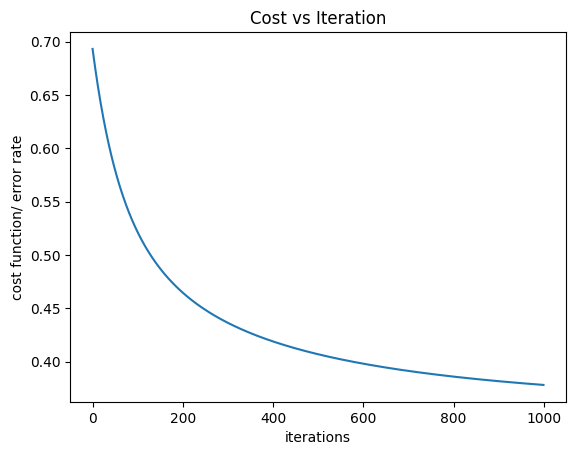

In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.title('Cost vs Iteration')
plt.xlabel('iterations')
plt.ylabel("cost function/ error rate")
plt.show()

In [ ]:
def predict(X):

# Calculating predictions/y_pred.
    y_pred= sigmoid(np.dot(X, w) + b)

# Empty List to store predictions.
    lr_pred = []
# if y_hat >= 0.5 --> round up to 1
# if y_hat < 0.5 --> round up to 1
    lr_pred = [1 if i > 0.5 else 0 for i in y_pred]

    return np.array(lr_pred)

In [ ]:
def accuracy(y, predictions):
    accuracy = np.sum(y == predictions) / len(y)
    print ("Accuracy of the model is : ", round(accuracy, 2))

In [ ]:
accuracy(y, predict(X))

Accuracy of the model is :  0.85


5.MODEL IMPROVEMENTS AND HYPERTUNING <br>

As seen above, the model's prediction accuracy is at 85% and the model can be approved to predict better.<br>
Below the model is improved my hypertuning the following parameters:<br>
-Weights and bias randomly chosen<br>
-Learning rate to 0.05<br>
-Number of iterations 15 000<br>

In [ ]:
def model1 (X, y, learning_rate, iterations):
    # X -> Input.
    # y -> Actual target value.

    # m -> number of training examples
    # n -> number of features
    m = X.shape[1]
    n = X.shape[0]

    # Initializing weights and bias with random values above 0.
    w = np.random.rand(n, 1)
    b = np.random.rand()

    # Empty list to store losses.
    cost_list = []

    for i in range(iterations):
        LinearR= np.dot(w.T, X) + b
        predictions1= sigmoid(LinearR)

        # cost function
        cost = -(1/m) * np.sum(y * np.log(predictions1) + (1-y) * np.log(1-predictions1))

        # Gradient Descent
        dw = (1/m) * np.dot(predictions1 - y, X.T)
        db = (1/m) * np.sum(predictions1 - y)

        w = w - learning_rate * dw.T
        b = b - learning_rate * db

        # Keeping track of our cost function value
        cost_list.append(cost)

        if (i % (iterations / 10) == 0):
            print("cost after", i, "iteration is:", cost)

    return w, b, cost_list


In [ ]:
def predict1(X):

# Calculating predictions/y_pred.
    y_pred1= sigmoid(np.dot(X, w) + b)

# Empty List to store predictions.
    lr_pred1 = []
# if y_hat >= 0.5 --> round up to 1
# if y_hat < 0.5 --> round up to 1
    lr_pred1 = [1 if i > 0.5 else 0 for i in y_pred1]

    return np.array(lr_pred1)

In [ ]:
def accuracy1(y, predictions1):
    accuracy1 = np.sum(y == predictions1) / len(y)
    print ("Accuracy of the model is : ", round(accuracy1, 2))

In [ ]:
iterations = 15000
learning_rate = 0.05
w, b, cost_list = model1(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

cost after 0 iteration is: 2.0705110199485763
cost after 1500 iteration is: 0.35612903824893477
cost after 3000 iteration is: 0.35601497951446226
cost after 4500 iteration is: 0.3560137056438071
cost after 6000 iteration is: 0.3560135253134974
cost after 7500 iteration is: 0.35601344734840756
cost after 9000 iteration is: 0.35601341075624937
cost after 10500 iteration is: 0.35601339352038525
cost after 12000 iteration is: 0.3560133854007554
cost after 13500 iteration is: 0.35601338157571893


In [ ]:
y_pred=predict(X)

In [ ]:
accuracy1(y,y_pred)

Accuracy of the model is :  0.86


As seen above, after the hypertuning of parameters the cost(loss function) decreased from 0.38 to 0.35 and the prediction accuracy of the model as slightly improved from 86%

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y,y_pred)

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[48809  9796]
 [ 8915 61967]]


conf_matrix[0, 0] is the count of True Negatives (TN).<br>
conf_matrix[0, 1] is the count of False Positives (FP).<br>
conf_matrix[1, 0] is the count of False Negatives (FN).<br>
conf_matrix[1, 1] is the count of True Positives (TP).<br>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.8554990076223868
Precision: 0.8634951158675084


### 6. Intepretation of results
**Model results**
The model achieved at most 86% prediction accuracy.Although this is a good score, the results could further be improved by doing a feature selection.
Out of the 21 features that were used as a x-variables, some of the could be dropped and only the suitable features could be used to build the model.The use of all 21 features could've caused overfitting hence the model did not improve past 86%.

**Confusion metrics**
The high precision score means that when the model predicted a customer as satisfied, it is highly likely to be correct. It reflects the model's ability to avoid false positive predictions, making few false positive errors.
The high recall means that the model is good at capturing most of the actual satisfied customers and has a low rate of false negatives. It reflects the model's ability to avoid missing satisfied customers.










